In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [ ]:
np.random.seed(0)    #to get predictable output from a random number generator we use seed

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))

## Problem 1
How many samples are there in the dataset?



## Solution

In [ ]:
# Enter your solution here
print(X.shape[0])

1998


## Problem 2

How many features are there in the dataset?


## Solution

In [ ]:
print(X.shape[1])

2


## Problem 3
Plot the dataset using matplotlib.



## Solution

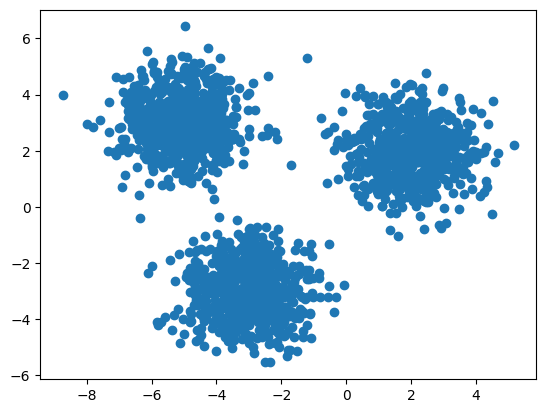

In [ ]:
# Enter your solution here
plt.scatter(X[:,0],X[:,1])
plt.show()


## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [ ]:
k = 3

cluster_centers = X[[200,800,1200]]
print(cluster_centers)

[[ 1.40134606  0.88410301]
 [-2.56922887 -3.14989159]
 [-2.84782302 -3.37412632]]


## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [ ]:
def distance(x,y):
  return np.linalg.norm((x - y))


# Enter your solution here
def assign_clusters(X, k, cluster_centers):
  z = np.array([])
  for point in X:
    dist_from_each_center = [distance(cluster_centers[i],point) for i in range(k)]
    chosen_cluster_for_point = np.argmin(dist_from_each_center)
    z = np.append(z,chosen_cluster_for_point)
  return z


z = assign_clusters(X, k, cluster_centers)
print(np.mean(z))

0.7107107107107107


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

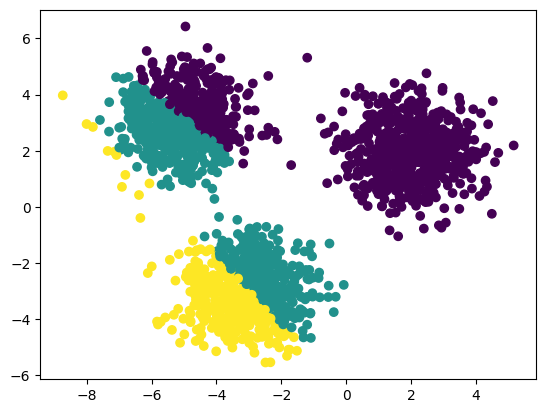

In [ ]:
plt.scatter(X[:,0],X[:,1],c = z)   #c = some list  and give colour accordingly
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [ ]:
def compute_cluster_centers(X, z, k):
  c_ = np.array([np.mean(X[z == i],axis=0) for i in range(k)])
  return c_

new_centers = compute_cluster_centers(X, z, 3)
print(new_centers.mean(axis=0))


[-2.55251646 -0.19225194]


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

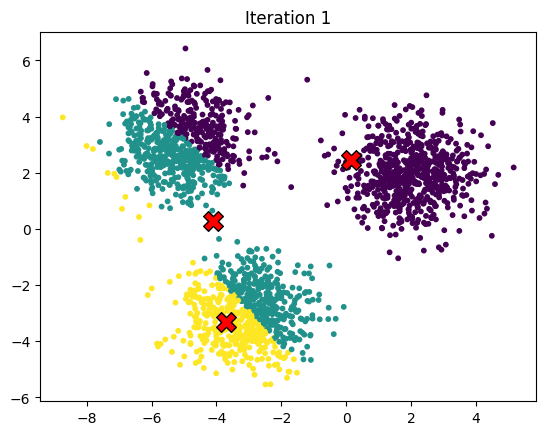

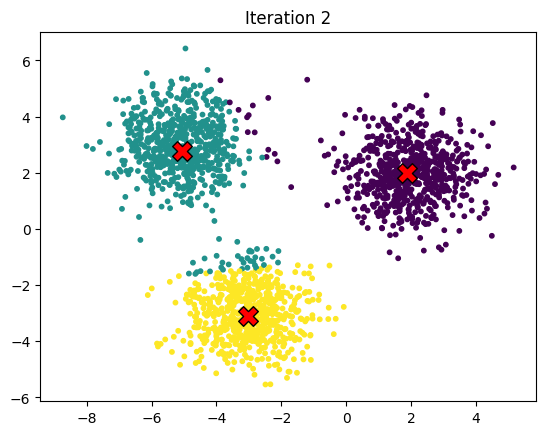

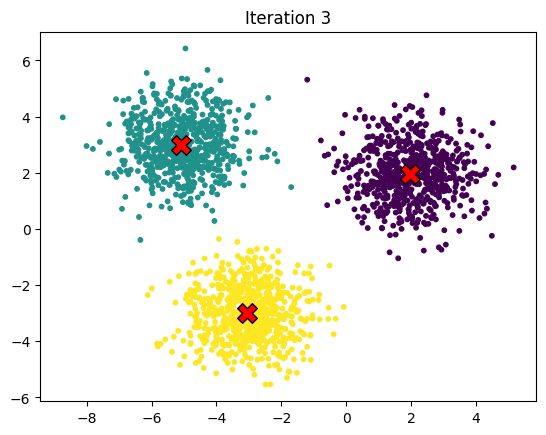

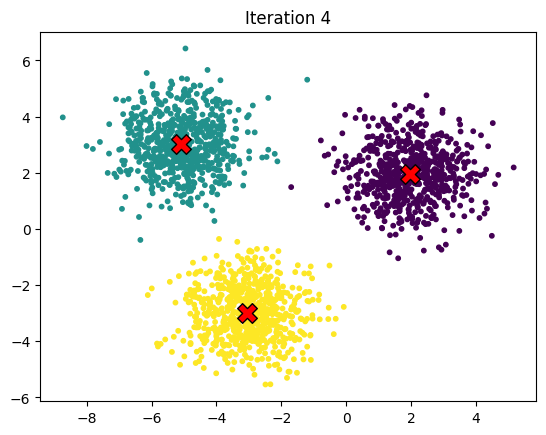

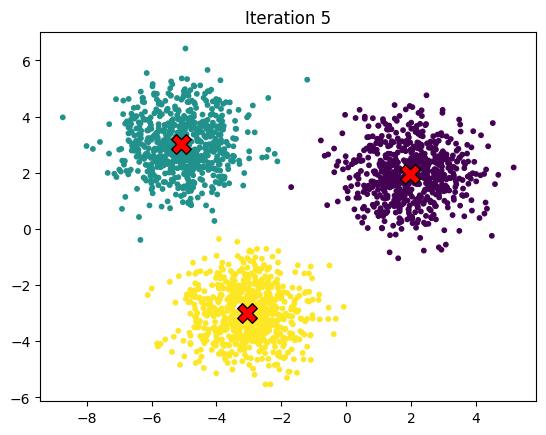

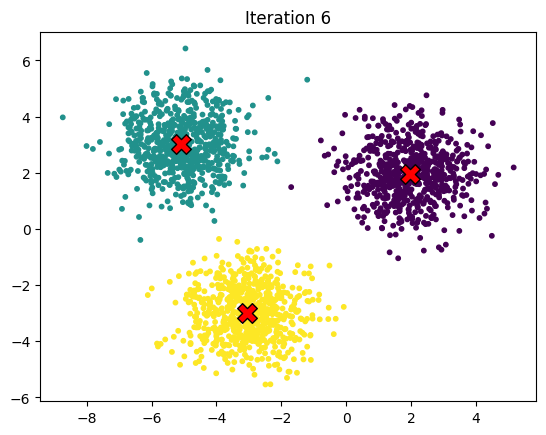

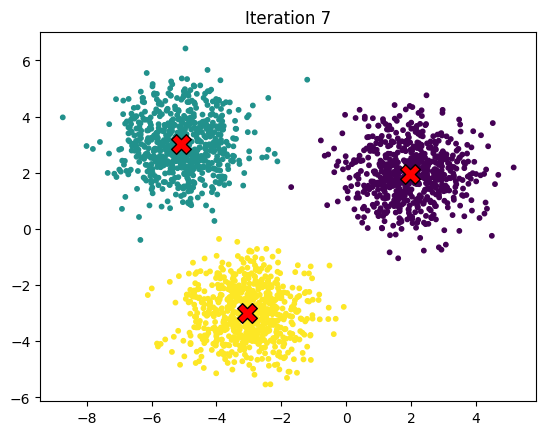

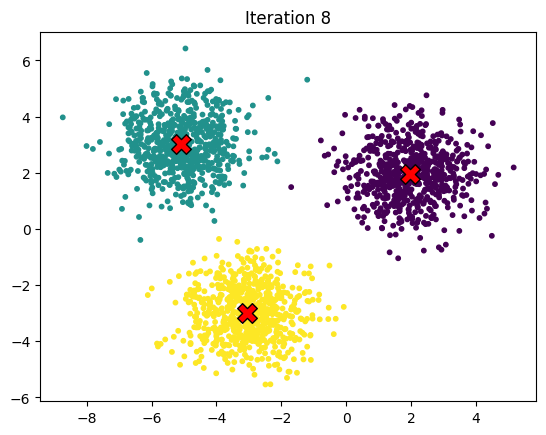

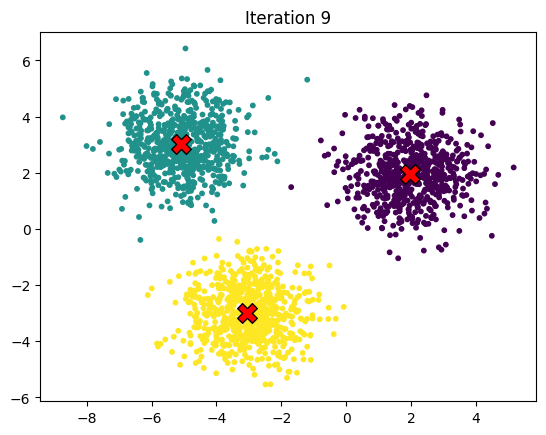

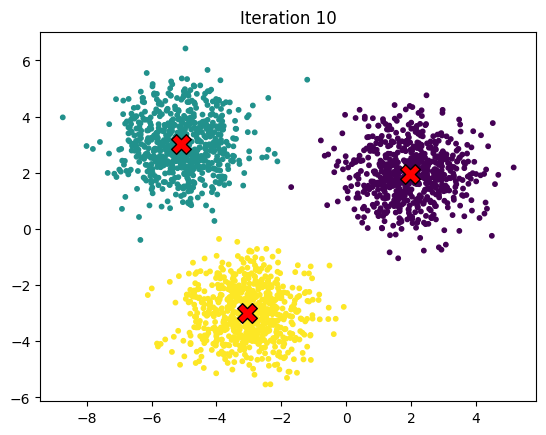

Final cluster centers after 10 iterations:
 [[ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]
 [-3.04475663 -2.98468709]]


In [ ]:
# Distance function (already defined)
def distance(x, y):
    return np.linalg.norm(x - y)

# Assign clusters
def assign_clusters(X, k, cluster_centers):
    z = np.zeros(len(X), dtype=int)
    for idx, point in enumerate(X):
        dist_from_each_center = [distance(cluster_centers[i], point) for i in range(k)]
        z[idx] = np.argmin(dist_from_each_center)
    return z

# Compute new cluster centers
def compute_cluster_centers(X, z, k):
    c_ = np.array([np.mean(X[z == i], axis=0) for i in range(k)])
    return c_

# Initialize
k = 3
cluster_centers = X[[200, 800, 1200]]

# Run K-Means for 10 iterations
for iteration in range(10):
    z = assign_clusters(X, k, cluster_centers)           # Step 1: assign
    cluster_centers = compute_cluster_centers(X, z, k)   # Step 2: recompute

    plt.scatter(X[:, 0], X[:, 1], c=z, cmap="viridis", s=10)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, edgecolors='black')
    plt.title(f"Iteration {iteration+1}")
    plt.show()

print("Final cluster centers after 10 iterations:\n", cluster_centers)
